In [1]:
import warnings
import datetime
import itertools
import numpy as np
import scipy as sp
import cvxpy as cp
import pandas as pd
import yfinance as yf
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from functools import reduce
from kit import get_yf_ts, get_mcap

warnings.filterwarnings('ignore')

This notebook examines data for stock market indices for different markets (developed and emerging economies) their performance in the last 5 years and their constituents (where possible with data).

🇪🇺 <b>STOXX 50</b> is a stock index of companies in Eurozone countries. It is a market weighted index of the 50 stocks from 11 countries, representing some of the largest companies in Europe. The index itself as well as its derivatives (index futures and options) are among some of the most liquid products in Europe and the world. It's <b>price in euros</b> below:

[]

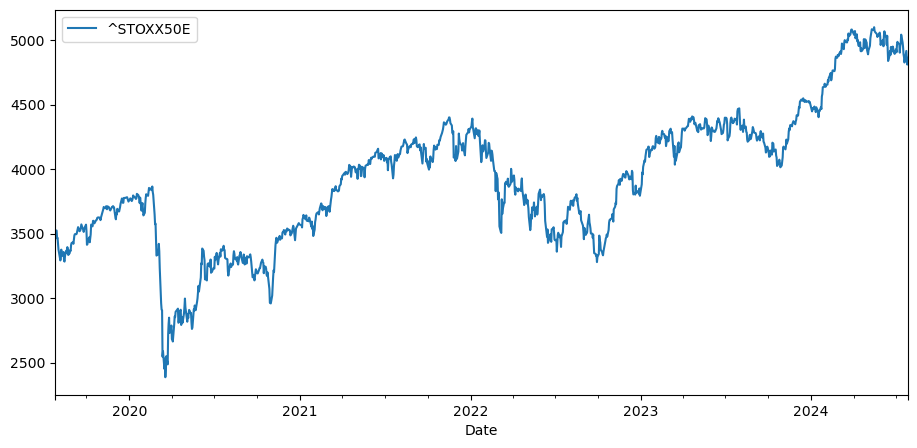

In [2]:
get_yf_ts('^STOXX50E', '5y', '1d').plot(figsize=(11,5))
plt.plot()

Short of data from Yahoo Finance, I am scraping the wikipedia page for its constituents, link for reference below:

In [3]:
stoxx50 = pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]

In [4]:
stoxx50['MARKET_CAP_EUR'] = stoxx50['Ticker'].apply(get_mcap)
stoxx50['WEIGHT'] = stoxx50['MARKET_CAP_EUR'] / stoxx50['MARKET_CAP_EUR'].sum()

In [5]:
print("STOXX50 approximate market cap: EUR " + "{:,}".format(stoxx50['MARKET_CAP_EUR'].sum())

STOXX50 approximate market cap: EUR 4,351,870,981,665.0


Below we observe the 15 largest constituents of STOXX50 as of today. Note, Yahoo Finance gives the total market cap and has no option for free floating cap (only public investor shares), so there might be some error in the ordering.

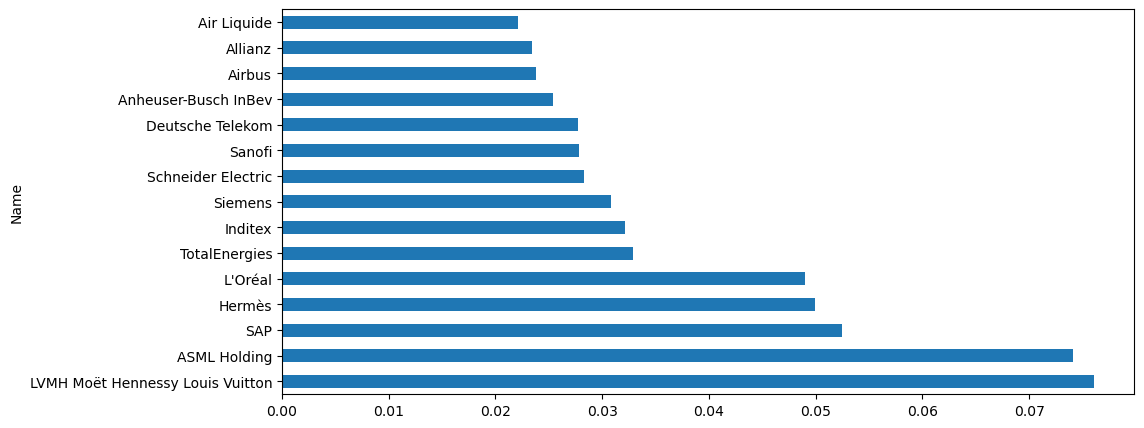

In [6]:
stoxx50.sort_values('WEIGHT', ascending=False).set_index('Name')['WEIGHT'].head(15).plot.barh(figsize=(11,5))
plt.show()

We also observe the participation of companies (market cap) by country and industry:

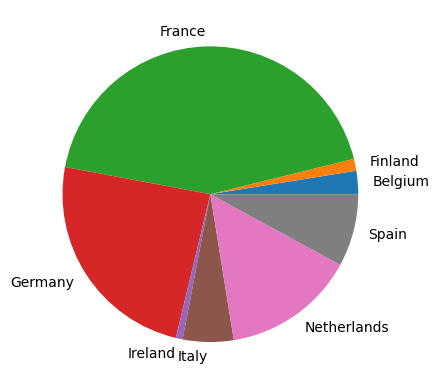

In [7]:
stoxx50.groupby('Registeredoffice')['WEIGHT'].sum().plot.pie(label='')
plt.show()

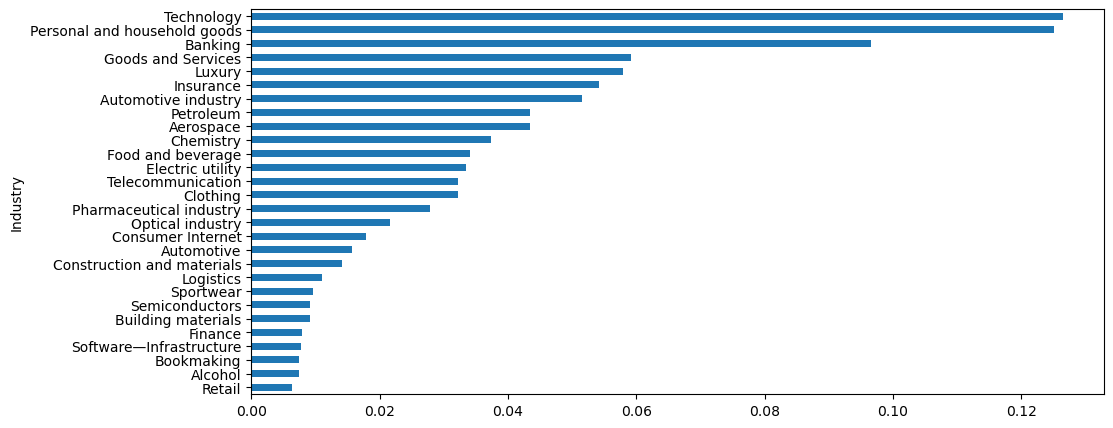

In [8]:
stoxx50.groupby('Industry')['WEIGHT'].sum().sort_values().plot.barh(figsize=(11,5))
plt.show()

🇺🇸 <b>Standard and Poor's 500 (S&P500)</b> tracks the 500 most liquid stocks listed on US exchanges, and represents 80% of the total market capitalization of US public companies a whopping $43 trillion as of start of 2024. Given its size, economists and analyst normally use its performance to track and project the direction of the US economy.

[]

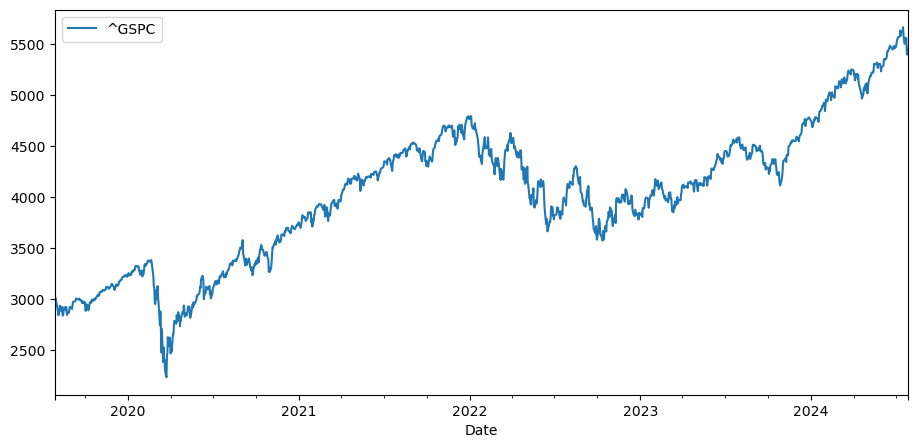

In [9]:
get_yf_ts('^GSPC', '5y', '1d').plot(figsize=(11,5))
plt.plot()

In [10]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [11]:
def try_except_mcap(ticker, usd=True): #For 500 constituents, more difficult to source every one from Yahoo Finance
    try:
        return get_mcap(ticker, usd=usd)
    except:
        return None

In [12]:
sp500['MARKET_CAP_USD'] = sp500['Symbol'].apply(lambda c: try_except_mcap(c, True))
sp500['WEIGHT'] = sp500['MARKET_CAP_USD'] / sp500['MARKET_CAP_USD'].sum()

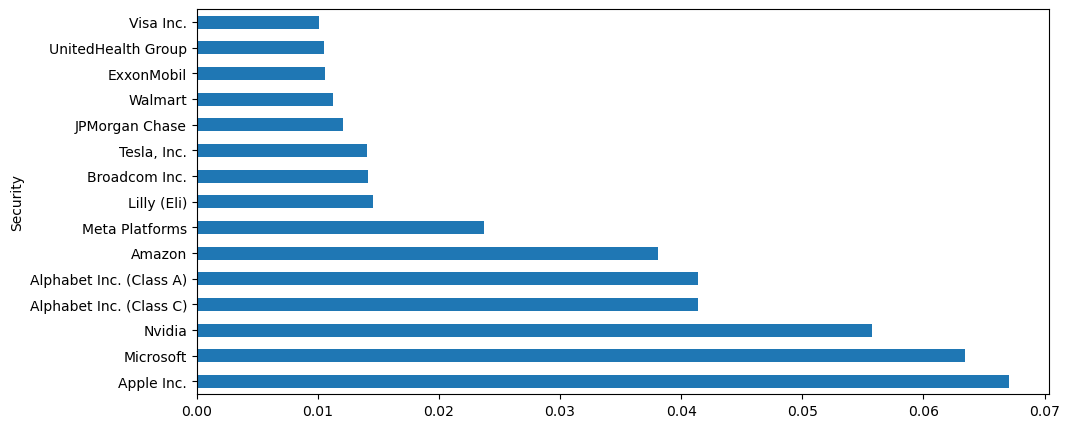

In [13]:
sp500.sort_values('WEIGHT', ascending=False).set_index('Security')['WEIGHT'].head(15).plot.barh(figsize=(11,5))
plt.show()

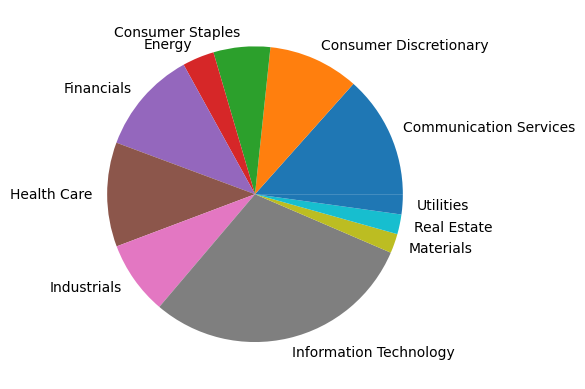

In [14]:
sp500.groupby('GICS Sector')['WEIGHT'].sum().plot.pie(label='')
plt.show()

🇬🇧 <b>Financial Times Stock Exchange 100 (FTSE 100) </b> is a stock index in the United Kingdom, representing the largest 100 UK companies by market capitalization. It is similarly market cap weighted (free floating) and has a market cap in excess of £2 trillion.

[]

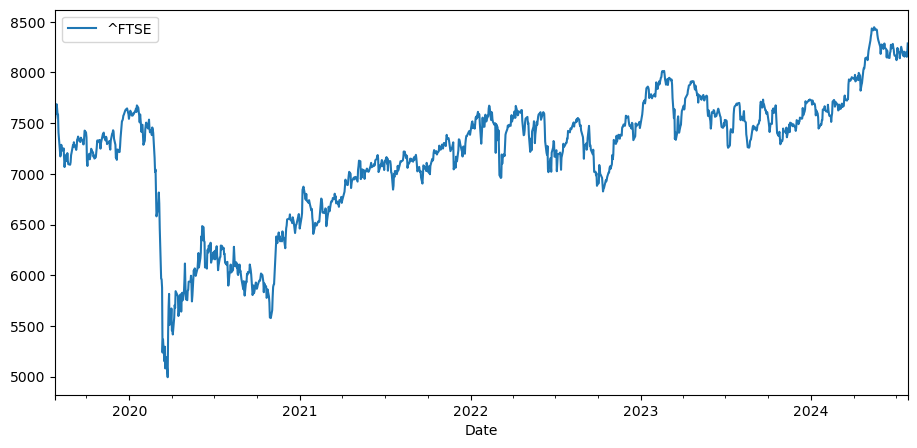

In [15]:
get_yf_ts('^FTSE', '5y', '1d').plot(figsize=(11,5))
plt.plot()

The code is quite repetitive and has small changes, as many tickers cannot be sourced via a unified API in Yahoo Finance.

In [16]:
def try_except_ftse_mcap(ticker):
    try:
        return yf.Ticker(ticker + '.L').balancesheet.loc['Total Capitalization'].iloc[0]
    except:
        return None

In [17]:
ftse = pd.read_html('https://en.wikipedia.org/wiki/FTSE_100_Index')[4]
ftse['MARKET_CAP_GBP'] = ftse['Ticker'].apply(try_except_ftse_mcap)
ftse['WEIGHT'] = ftse['MARKET_CAP_GBP'] / ftse['MARKET_CAP_GBP'].sum()

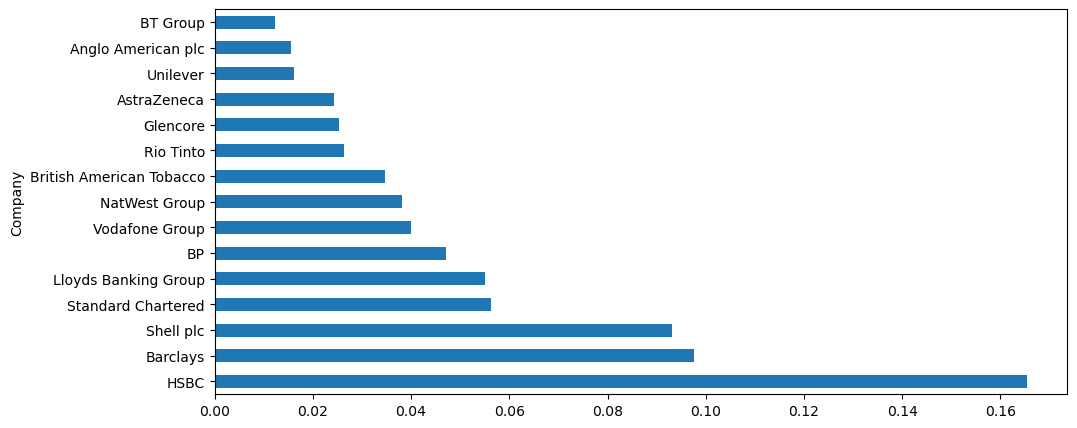

In [18]:
ftse.sort_values('WEIGHT', ascending=False).set_index('Company')['WEIGHT'].head(15).plot.barh(figsize=(11,5))
plt.show()

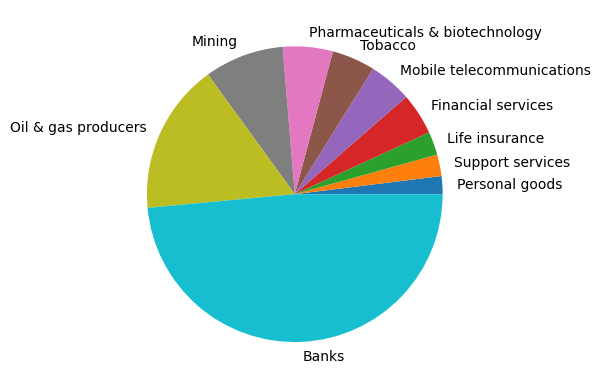

In [19]:
ftse.groupby('FTSE industry classification benchmark sector[25]')['WEIGHT'].sum().sort_values().tail(10).plot.pie(label='')
plt.show()

🇯🇵 <b>Nikkei 225</b> is a Japanese stock index, tracking the 225 publicly listed companies with high market capitalization. It is a price-weighted index in JP¥ and has companies from many different industries.

[]

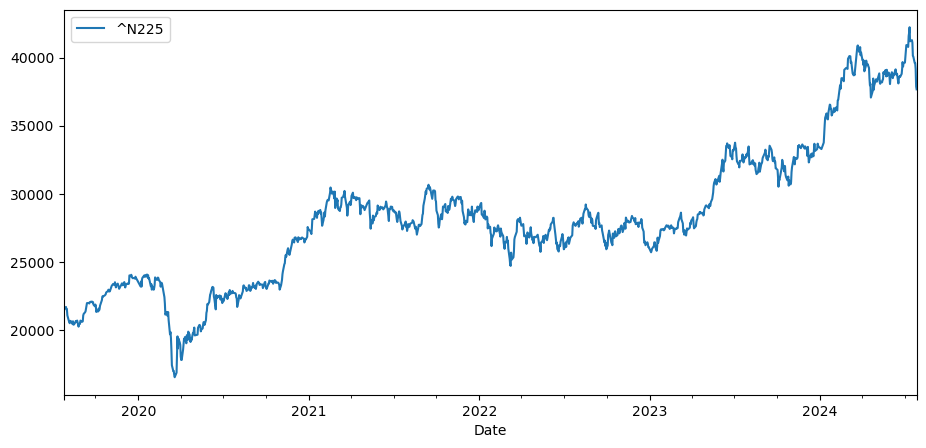

In [20]:
get_yf_ts('^N225', '5y', '1d').plot(figsize=(11,5))
plt.plot()

🇯🇵 <b>TOPIX</b> is a Japanese stock index, tracking a wider range (nearly 2000) publicly listed companies with highest market capitalization. In contrast to Nikkei 225, it is market cap weighted and also in JP¥.

[]

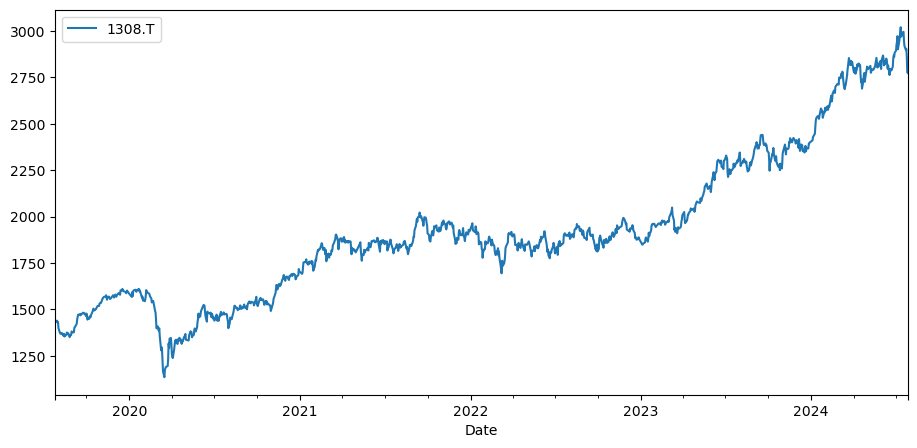

In [22]:
get_yf_ts('1308.T', '5y', '1d').plot(figsize=(11,5))
plt.plot()

🇫🇷 <b>Cotation Assistée en Continu (CAC 40)</b> is a stock market index representing a capitalization-weighted measure of the 40 most significant publicly listed companies in France.

In [23]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]

In [25]:
cac40

Company                  Sector  \
0                 Air Liquide         Basic Materials   
1                      Airbus             Industrials   
2                      Alstom             Industrials   
3               ArcelorMittal         Basic Materials   
4                         Axa      Financial Services   
5                 BNP Paribas      Financial Services   
6                    Bouygues             Industrials   
7                   Capgemini              Technology   
8                   Carrefour      Consumer Defensive   
9             Crédit Agricole      Financial Services   
10                     Danone      Consumer Defensive   
11          Dassault Systèmes              Technology   
12                    Edenred             Industrials   
13                      Engie               Utilities   
14           EssilorLuxottica              Healthcare   
15        Eurofins Scientific              Healthcare   
16                     Hermès       Consumer Cyclical   
17                     Kering       Consumer Cyclical   
18                    L'Oréal      Consumer Defensive   
19                    Legrand             Industrials   
20                       LVMH       Consumer Cyclical   
21                   Michelin             Industrials   
22                     Orange  Communication Services   
23              Pernod Ricard      Consumer Defensive   
24                   Publicis  Communication Services   
25                    Renault       Consumer Cyclical   
26                     Safran             Industrials   
27               Saint-Gobain             Industrials   
28                     Sanofi              Healthcare   
29         Schneider Electric             Industrials   
30           Société Générale      Financial Services   
31                 Stellantis       Consumer Cyclical   
32         STMicroelectronics              Technology   
33            Teleperformance  Communication Services   
34                     Thales             Industrials   
35              TotalEnergies                  Energy   
36  Unibail-Rodamco-Westfield             Real Estate   
37                     Veolia             Industrials   
38                      Vinci             Industrials   
39                  Worldline              Technology   

                        GICS Sub-Industry    Ticker  
0                        Industrial Gases     AI.PA  
1                     Aerospace & Defense    AIR.PA  
2                          Rail Transport    ALO.PA  
3                                   Steel     MT.AS  
4                 Life & Health Insurance     CS.PA  
5                       Diversified Banks    BNP.PA  
6              Construction & Engineering     EN.PA  
7          IT Consulting & Other Services    CAP.PA  
8            Hypermarkets & Super Centers     CA.PA  
9                          Regional Banks    ACA.PA  
10                 Packaged Foods & Meats     BN.PA  
11                   Application Software    DSY.PA  
12        Transaction Processing Services   EDEN.PA  
13                          Gas Utilities   ENGI.PA  
14    Apparel, Accessories & Luxury Goods     EL.PA  
15                        Biotechnologies    ERF.PA  
16    Apparel, Accessories & Luxury Goods    RMS.PA  
17    Apparel, Accessories & Luxury Goods    KER.PA  
18                      Personal Products     OR.PA  
19      Electrical Components & Equipment     LR.PA  
20    Apparel, Accessories & Luxury Goods     MC.PA  
21                         Tires & Rubber     ML.PA  
22  Integrated Telecommunication Services    ORA.PA  
23                  Distillers & Vintners     RI.PA  
24                            Advertising    PUB.PA  
25               Automobile Manufacturers    RNO.PA  
26                    Aerospace & Defense    SAF.PA  
27                      Building Products    SGO.PA  
28                        Pharmaceuticals    SAN.PA  
29      Electrical Components & Equipment     SU.PA  
30        